In [1]:
import sys
import os
import matplotlib.pyplot as plt

In [2]:
utilities_path = os.path.abspath('../utilities')
sys.path.append(utilities_path)

from connexion import fetch_artists_dataframe

df = fetch_artists_dataframe()
print(df.head())


                        _id               artist_id   name  \
0  6787927675ad556bba408186  1ZZ80dIJCjKdQd5Hu6Mjsk  松谷 祐子   
1  6787927975ad556bba408187  5sIpD4IMJlqyaNxA8qNTnJ    林嘉欣   
2  6787927c75ad556bba408188  2bgJqyxN97sNfRqoPhsdQI    林姍姍   
3  6787927e75ad556bba408189  1VBXPX6NAo736pqr4MQWp6    林師傑   
4  6787928275ad556bba40818a  2KdnPDVFj8F2uhqgeMHXea     林強   

                                              genres  popularity  followers  \
0                                                 []          30       1108   
1                                         [cantopop]          22       3760   
2                                 [classic cantopop]          29       6935   
3                     [cantopop, hong kong tv drama]          18       5035   
4  [classic mandopop, taiwan pop, taiwan singer-s...          28      28290   

                                              albums  
0  [{'album_id': '3Q80IekfQVdlXUnavNDuTI', 'album...  
1  [{'album_id': '70MhwkqG5XzTYqLwgzEEmW',

In [11]:
print(df.columns)

Index(['_id', 'artist_id', 'name', 'genres', 'popularity', 'followers',
       'albums'],
      dtype='object')


### Dimensions du DataFrame

In [3]:
print(f"Dimensions: {df.shape}")

Dimensions: (4193, 7)


 ### Types de données et valeurs non nulles

In [4]:
print(df.describe())

        popularity     followers
count  4193.000000  4.193000e+03
mean     31.420940  3.770106e+05
std      18.126149  3.122815e+06
min       0.000000  0.000000e+00
25%      18.000000  3.467000e+03
50%      31.000000  1.566100e+04
75%      44.000000  7.799100e+04
max      94.000000  9.879443e+07


### Vérifier les valeurs manquantes

In [5]:
print(df.isnull().sum())

_id             0
artist_id       0
name            0
genres          0
popularity      0
followers       0
albums        376
dtype: int64


### Histogrammes pour toutes les variables numériques

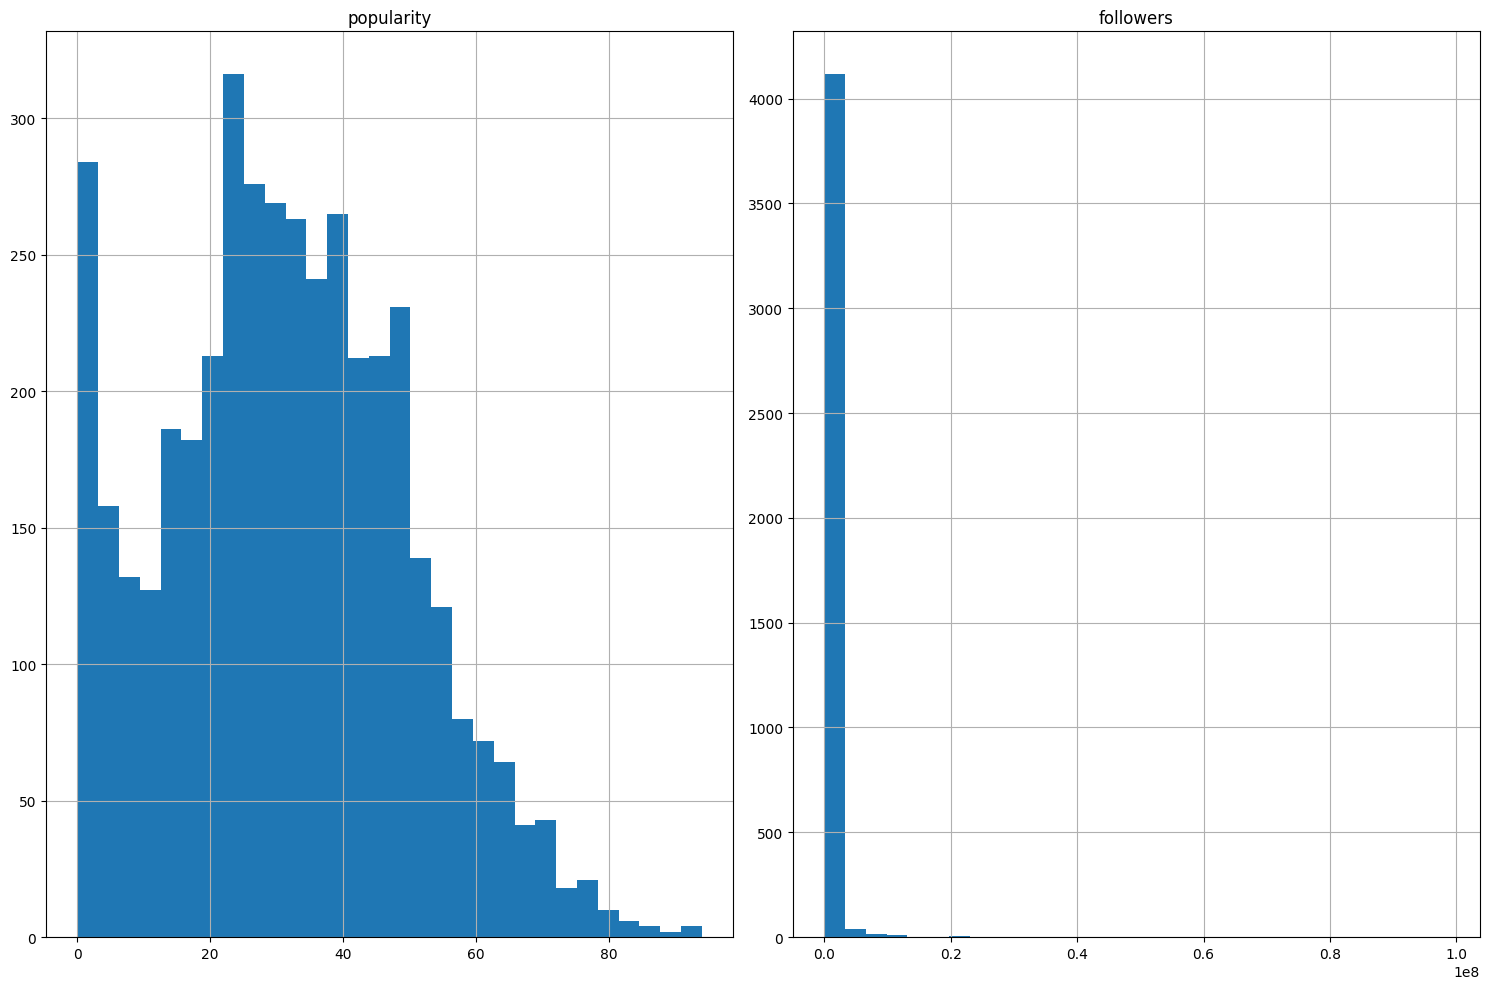

In [6]:
df.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

### Matrice de corrélation pour les variables numériques

In [7]:
df_numeric = df.select_dtypes(include=['number'])  # Sélectionne uniquement les colonnes numériques
correlation_matrix = df_numeric.corr()  # Calcule la matrice de corrélation
print(correlation_matrix)


            popularity  followers
popularity    1.000000   0.283365
followers     0.283365   1.000000


### Afficher la matrice de corrélation avec une heatmap

In [8]:
import seaborn as sns

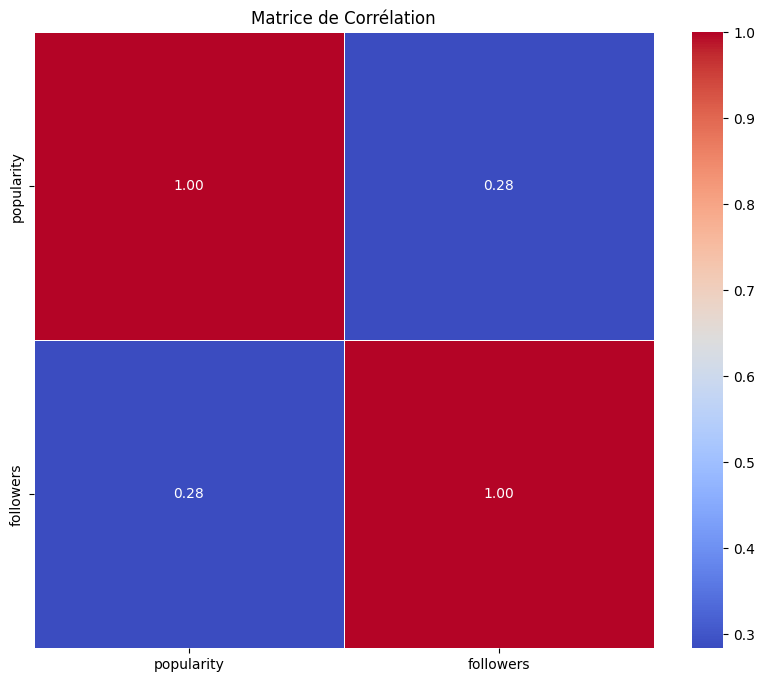

In [9]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matrice de Corrélation")
plt.show()

### Vérifier la distribution des variables catégorielles

In [15]:
colonnes_cat = ['_id', 'artist_id', 'name', 'genres', 'albums']

for col in colonnes_cat:
    print(f"Distribution de la colonne {col} :")
    print(df[col].value_counts())
    print("\n" + "="*50 + "\n")


Distribution de la colonne _id :
_id
6787927675ad556bba408186    1
67975f3dbea50a4a3c3d91bb    1
67975f40bea50a4a3c3d91bd    1
67975f43bea50a4a3c3d91be    1
67975f45bea50a4a3c3d91bf    1
                           ..
6788be1782f6fbcdaf0b7066    1
6788be2282f6fbcdaf0b7067    1
6788be2e82f6fbcdaf0b7068    1
6788be3782f6fbcdaf0b7069    1
67bde9316c2fab468545fcfc    1
Name: count, Length: 4193, dtype: int64


Distribution de la colonne artist_id :
artist_id
1ZZ80dIJCjKdQd5Hu6Mjsk    2
5sIpD4IMJlqyaNxA8qNTnJ    2
7hmSHY9HVVQKejpGbPbo16    2
2hgxWUG24w1cFLBlPSEVcV    2
5pmbNBnoMiNA16eg71vvsg    2
                         ..
6yfUz4F7jvOfc8RbK9AmNR    1
0ycHhPwPvoaO4VGzmMnXGq    1
0e1hn6R8UCfLkpHINwAyXR    1
3yyWIPmsesks6c7uMnvNn2    1
4W8Yz77BGq4uaiqCR2sYJ9    1
Name: count, Length: 4182, dtype: int64


Distribution de la colonne name :
name
松谷 祐子                       2
林嘉欣                         2
詹雯婷                         2
許嵩                          2
許含光                         2
   

### Diagramme en barres pour la variable catégorielle


C:\Users\rakot\AppData\Local\Temp\ipykernel_18552\2348583497.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette="coolwarm")


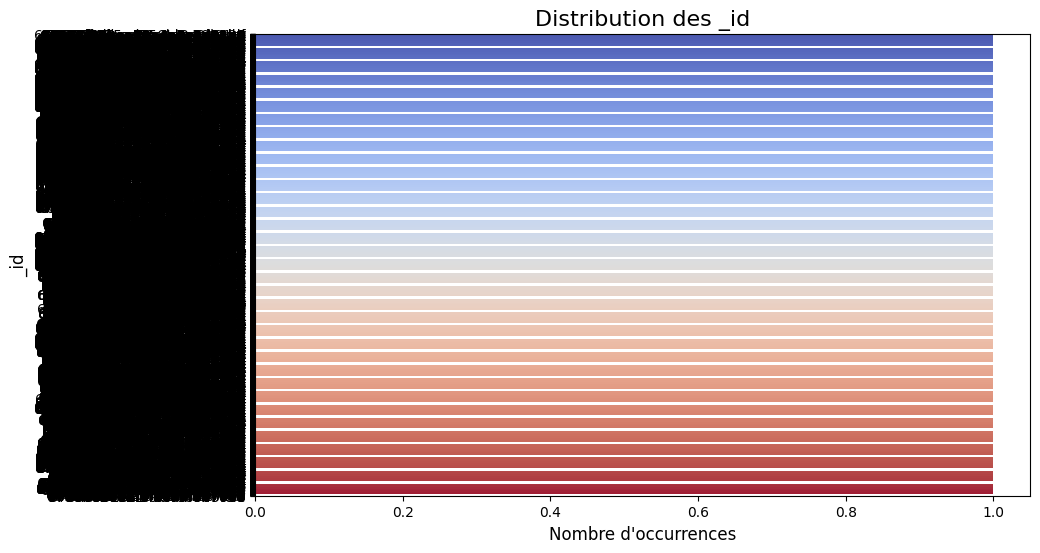

C:\Users\rakot\AppData\Local\Temp\ipykernel_18552\2348583497.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette="coolwarm")


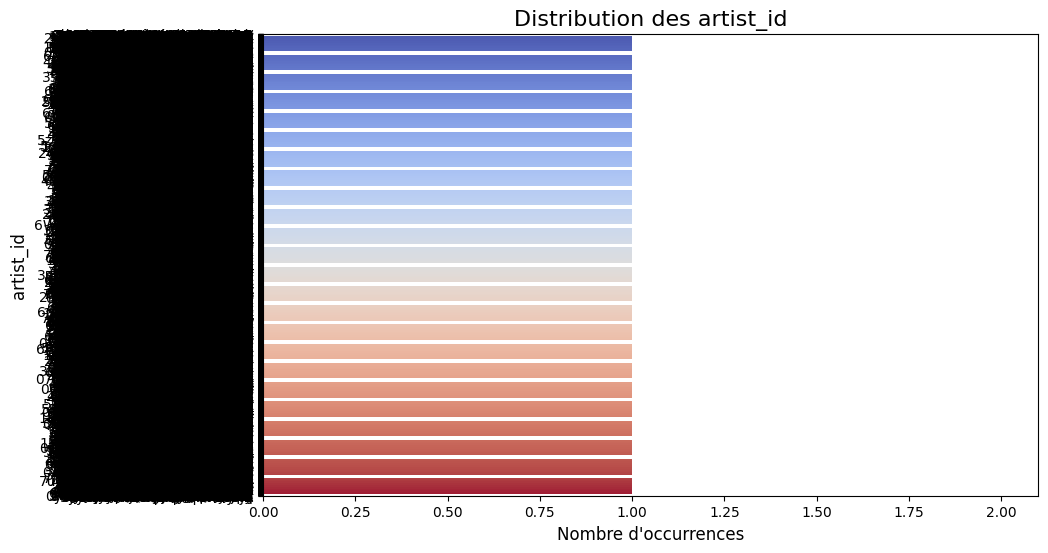

C:\Users\rakot\AppData\Local\Temp\ipykernel_18552\2348583497.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette="coolwarm")
C:\Users\rakot\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 26494 (\N{CJK UNIFIED IDEOGRAPH-677E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\rakot\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 35895 (\N{CJK UNIFIED IDEOGRAPH-8C37}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\rakot\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 31056 (\N{CJK UNIFIED IDEOGRAPH-7950}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\U

KeyboardInterrupt: 

In [18]:

for col in colonnes_cat:
    plt.figure(figsize=(10, 6))
    sns.countplot(y=df[col], order=df[col].value_counts().index, palette="coolwarm")
    
    plt.title(f'Distribution des {col}', fontsize=16)
    plt.xlabel('Nombre d\'occurrences', fontsize=12)
    plt.ylabel(f'{col}', fontsize=12)
    
    plt.show()


### Vérifier les types de données dans chaque colonne

In [19]:
print(df.dtypes)

_id           object
artist_id     object
name          object
genres        object
popularity     int64
followers      int64
albums        object
dtype: object


### Compter les valeurs uniques pour chaque colonne